# Исследование успешности игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Оглавление
<a name="All"></a>

* [1. Общая информация](#Step1)
* [2. Предобработка данных](#Step2)
* [3. Добавление дополнительных значений](#Step3)
* [4. Исследовательский анализ данных](#Step4)
* [5. Общий вывод](#Step5)

### <a name="Step1"></a> 1.  Общая информация

[Наверх](#All)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(3)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
games.duplicated().sum()

0

In [7]:
games.groupby('Platform').sum()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
Platform,,,,,,
2600,229928.0,90.60,5.47,0.00,0.91,0.0
3DO,5984.0,0.00,0.00,0.10,0.00,0.0
3DS,1030721.0,83.49,61.48,100.67,13.36,11273.0
DC,103997.0,5.43,1.69,8.56,0.27,1223.0
DS,4259361.0,382.40,188.89,175.57,59.26,45717.0
GB,193608.0,114.32,47.82,85.12,8.20,0.0
GBA,1624604.0,187.54,75.25,47.33,7.73,29509.0
GC,1085843.0,133.46,38.71,21.58,5.18,31131.0
GEN,57798.0,21.05,6.05,2.70,0.97,0.0


In [8]:
games.groupby('Genre').sum()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
Genre,,,,,,
Action,6640613.0,879.01,519.13,161.43,184.60,125929.0
Adventure,2596685.0,105.26,63.54,52.30,16.49,21102.0
Fighting,1677895.0,223.36,100.33,87.48,36.36,28310.0
Misc,3454612.0,407.27,212.74,108.11,74.39,34842.0
Platform,1759387.0,445.50,200.35,130.83,51.09,33825.0
Puzzle,1140976.0,122.87,50.01,57.31,12.38,15103.0
Racing,2457964.0,359.35,236.51,56.71,76.10,50429.0
Role-Playing,2972541.0,330.81,188.71,355.41,59.63,53545.0
Shooter,2599819.0,592.24,317.34,38.76,104.11,66251.0


### <a name="Step2"></a> 2. Предобработка данных

[Наверх](#All)

1. Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
    * Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    * Опишите причины, которые могли привести к пропускам;
    * Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

#### 2.1 Замените названия столбцов (приведите к нижнему регистру)

In [9]:
games.columns = games.columns.str.lower()

In [10]:
games['genre'] = games['genre'].str.lower()
games['platform'] = games['platform'].str.lower()

#### 2.2 - 2.3 Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему. Обработайте пропуски при необходимости

In [11]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

* name - 2 пропуска и по сути нам не важно название конкретных игр, оставляем как есть
* year_of_release - 269 пропусков, примерно 1,5% от общей массы - как мне кажется можно проигнорировать
* critic_score - 8578, много довольно, что бы не путать значение с 0 оценкой, имеет смысл установить значение "-1"
* user_score - 6701 - имеет смысл заполнить, значением "-1"
* rating - 6766 - оценивающая компания была основана в 1994 году только и видимо не все игры удостоиились оценки, думаю можно заполнить значением "no_rating" например

In [12]:
games.loc[games['user_score'] == 'tbd','user_score'] = np.nan

In [13]:
games['user_score'] = games['user_score'].fillna(-1)
games['critic_score'] = games['critic_score'].fillna(-1)
games['rating'] = games['rating'].fillna('no_rating')

Отдельно рассмотрим значение user_score равное tbd

In [14]:
# games[games['user_score'] == 'tbd']

TBD - это To Be Determined (будет определено), по сути означает что оценки нет, нужно проставить np.nan

In [15]:
#games.loc[games['user_score'] == 'tbd','user_score'] = np.nan

Приведем типы:

In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null object
rating             16715 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Нужно привести user_score к типу float. Остальные столбцы по значениям соответствуют данным.

In [17]:
games['user_score'] = games['user_score'].astype('float')

#### 2.4 Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [18]:
games['sales'] = games['other_sales'] + games['na_sales'] + games['eu_sales'] + games['jp_sales']

### <a name="Step3"></a> 3. Исследовательский анализ данных

[Наверх](#All)

1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
    1. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
    * Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
    * Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    * Соотнесите выводы с продажами игр на других платформах.
    * Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


#### 3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

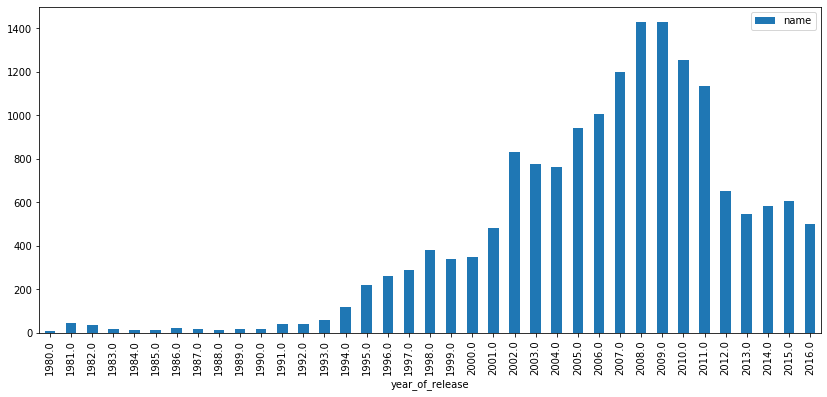

In [19]:
games.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar',figsize=(14, 6))
#plt.figure(figsize=(18, 6))
plt.show()

Первые игры появились в 80-х, с 90 года пошел рост выпуска игр, и рассвет игровой индустрии пришелся на 2002 - 2011 годы, уже в 2012 обьемы выпуска игр сократились в два раза и держатся на одном уровне до 2016 включительно.
Данные за все периоды нам не важны, игры довольно быстро устаревают и меняется целевая аудитория. Поэтому разумно учитывать последние 3-4 года.

#### 3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Посмотрим на популярные платформы по продажам:

In [20]:
pl = games.groupby('platform').agg({'sales':'sum'}).reset_index().sort_values(by='sales', ascending=False).head(5)
pl

,platform,sales
16,ps2,1255.77
28,x360,971.42
17,ps3,939.65
25,wii,907.51
4,ds,806.12


Сделаем табличку суммарные продажи по годам по платформам

In [21]:
platform_year_sales = games.groupby(by=['platform','year_of_release']).agg({'sales':'sum'}).reset_index().sort_values(by='sales', ascending=False)

In [22]:
def graffik_1(plat):    
    plt.figure(figsize=(14, 4))
    sns.barplot(data=platform_year_sales[platform_year_sales['platform'] == plat],
            x='year_of_release', 
            y='sales',
            dodge=False,
            color="seagreen"
           )

    plt.title(plat, fontsize=20)
    plt.show()

Построим графики по популярным платформам по годам:

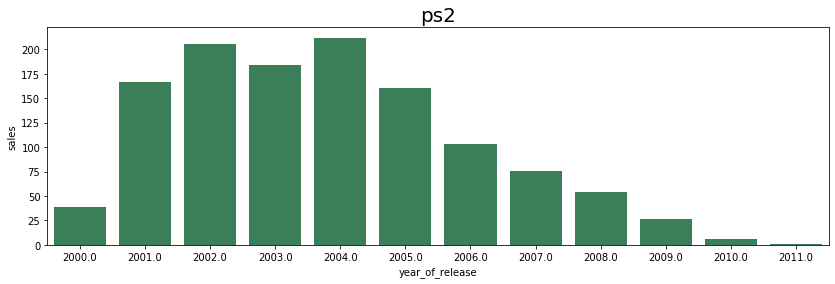

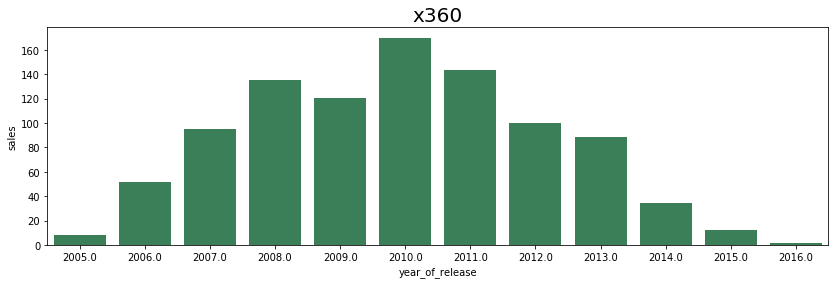

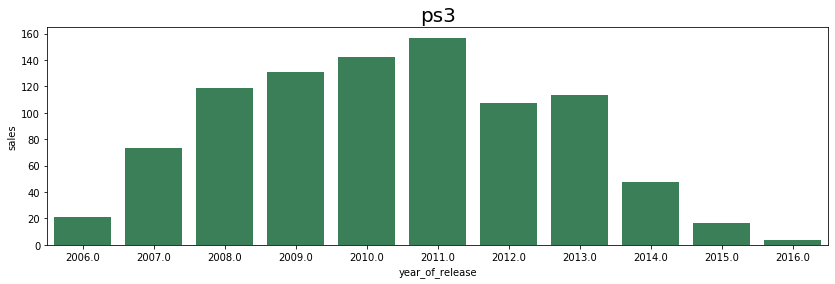

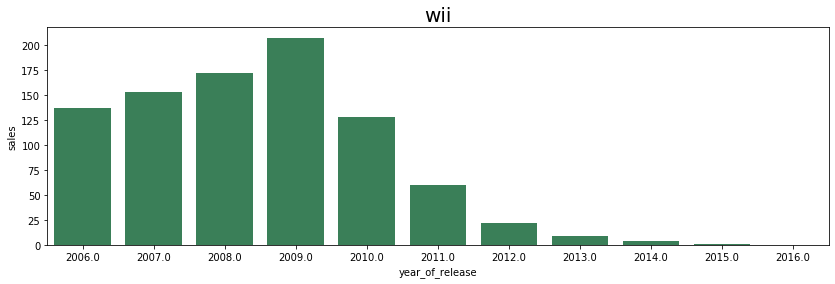

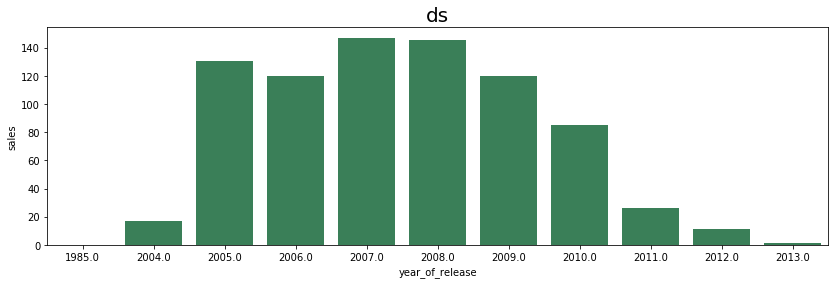

In [23]:
for i in range(5):
    graffik_1(pl.iloc[i][0])

Платформы живут по 10 лет примерно, из которых 5 - 6 лет получают основную прибыль.

#### 3.3

Итак, нам надо определить актуальный период, который будем использовать для построения прогноза на 2017 год. На основе предыдущих исследований имеет смысл взять период с 2006 года, в который попали основные популярные игровые платформы. 

In [24]:
#games_new = games[games['year_of_release'] >= 2006]

In [25]:
games_new = games[games['year_of_release'] >= 2010]

#### 3.3А Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Посмотрим широким взглядом на сравнительный график по всем платформам:

In [26]:
platform_year_sales_new = platform_year_sales[platform_year_sales['year_of_release'] >= 2010].sort_values(by='year_of_release', ascending=False)

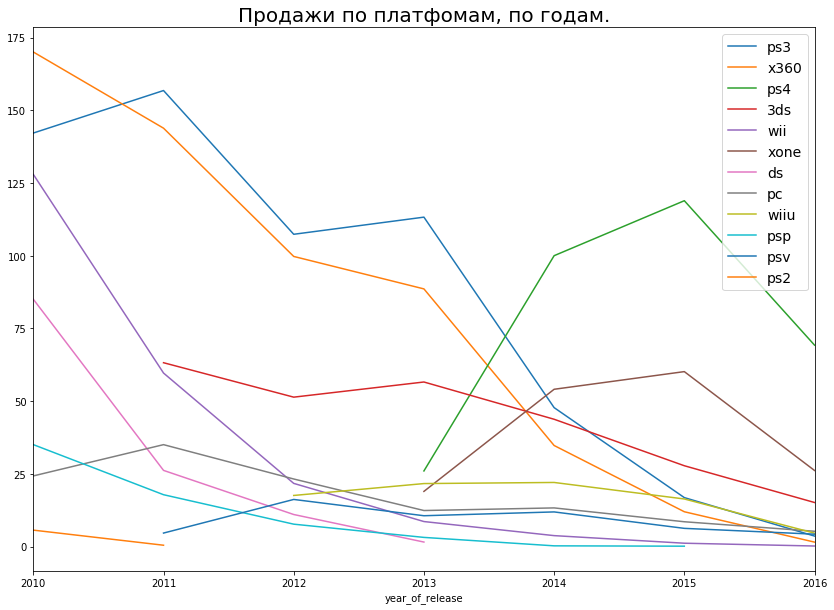

In [27]:
legend = []
plat = platform_year_sales_new.groupby('platform').agg({'sales':'sum'}).reset_index().sort_values(by='sales', ascending=False)['platform']
ax = plt.gca()
for platform in plat:
    
    a = platform_year_sales_new[platform_year_sales_new['platform'] == platform].plot(x='year_of_release',
                                                                                      y='sales',
                                                                                      ax=ax, 
                                                                                      kind='line',
                                                                                      figsize=(14,10),
                                                                                      label=platform)
    legend.append(platform)
ax.legend(legend, prop={'size':14})
plt.title('Продажи по платфомам, по годам.', fontsize=20)
plt.show()


Посмотрим более подробно на конец 2016 года:

In [28]:
platform_year_sales_new = platform_year_sales[platform_year_sales['year_of_release'] >= 2015].sort_values(by='year_of_release', ascending=False)

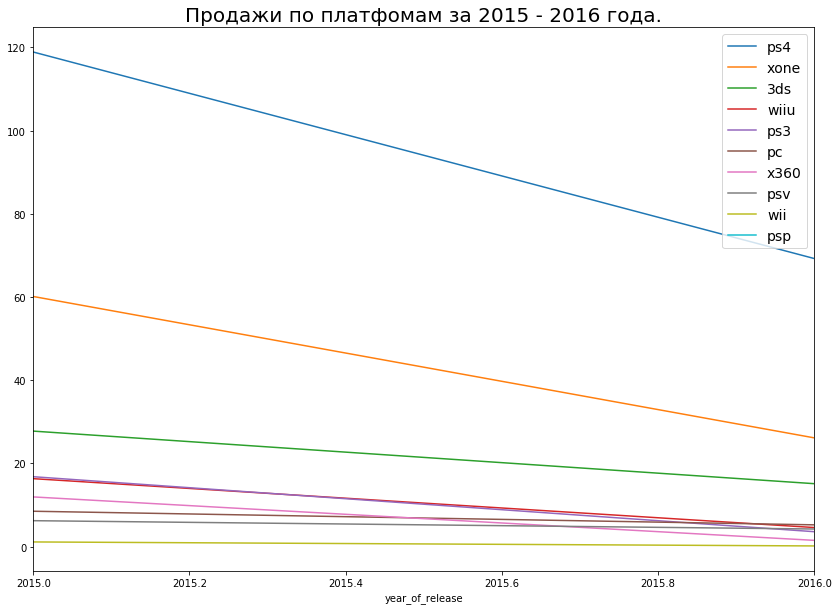

In [29]:
plat = platform_year_sales_new.groupby('platform').agg({'sales':'sum'}).reset_index().sort_values(by='sales', ascending=False)['platform']
ax = plt.gca()
for platform in plat:
    
    a = platform_year_sales_new[platform_year_sales_new['platform'] == platform].plot(x='year_of_release',
                                                                                      y='sales',
                                                                                      ax=ax, 
                                                                                      kind='line',
                                                                                      figsize=(14,10),
                                                                                      label=platform)
ax.legend(prop={'size':14})
plt.title('Продажи по платфомам за 2015 - 2016 года.', fontsize=20)
plt.show()

В конце 2016 лидируют по продажам PS4, Xone, 3ds. Однако тренд идет на снижение.

#### 3.3B Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


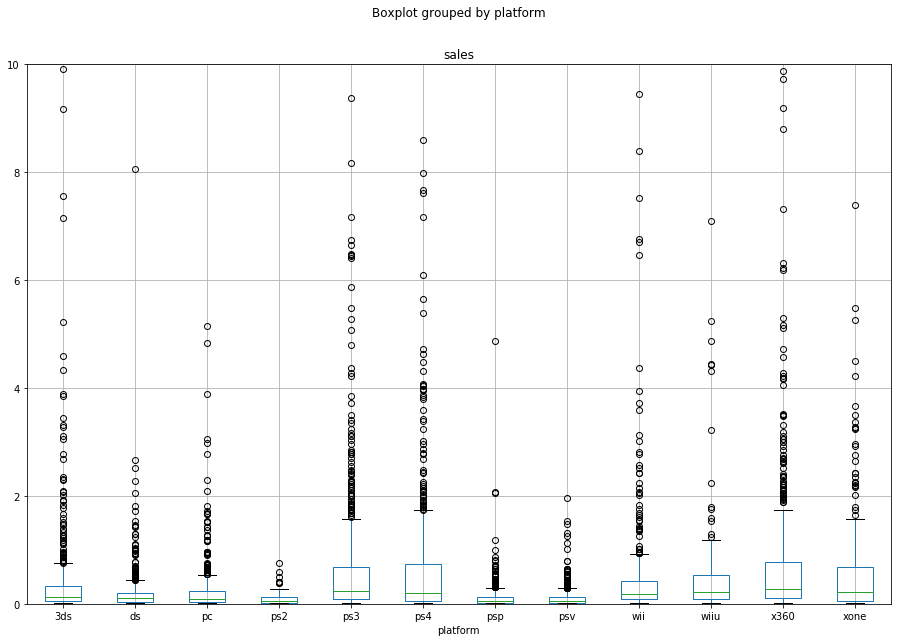

In [30]:
ax = games_new.boxplot(by='platform',column='sales', figsize=(15,10))
ax.set_ylim([0, 10])  

plt.show()

Можно сказать что большинство игр на любых платформах - не очень хорошо продается, хорошо продаются видимо ААА-проекты, которых не очень много.

#### 3.3C Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

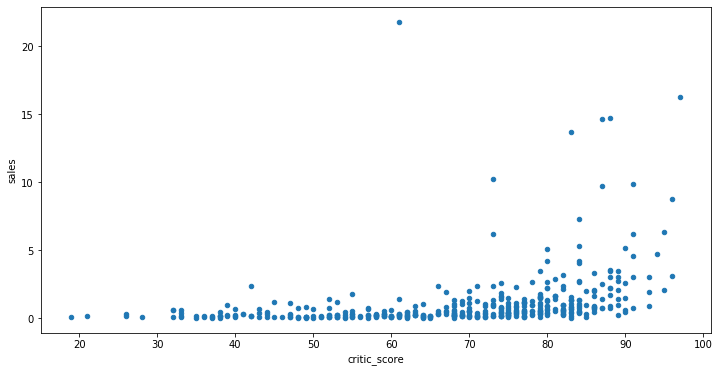

In [31]:
games_x = games_new[(games_new['platform'] == 'x360') & (games_new['critic_score'] > 0)]
games_x.plot(kind='scatter', x='critic_score', y='sales', figsize=(12,6))

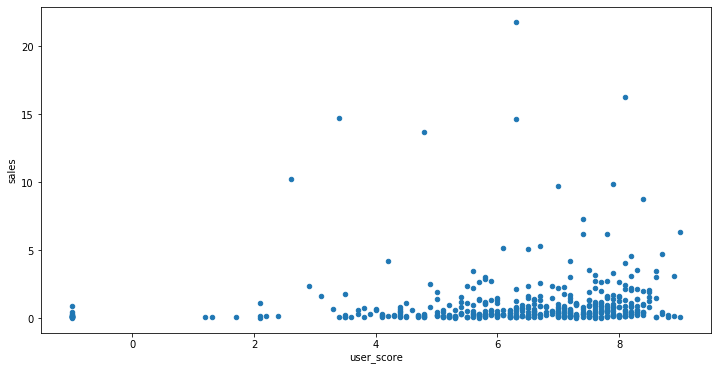

In [32]:
games_x = games_new[(games_new['platform'] == 'x360') & (games_new['critic_score'] > 0)]
games_x.plot(kind='scatter', x='user_score', y='sales', figsize=(12,6))

Впринципе связь прослеживается - больше оценка, больше продаж игры.

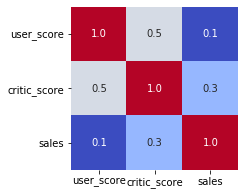

In [33]:
games_x_corr = games_x[['user_score','critic_score','sales']]
plt.figure(figsize = (3,3))
sns.heatmap(games_x_corr.corr(), annot=True, annot_kws={"size": 10},
            cmap= 'coolwarm', cbar=False, fmt=".1f")
plt.show()

Средняя корелляция продаж с мнением критиков, мнение юзеров не учитывается.

#### 3.3D Соотнесите выводы с продажами игр на других платформах.

Возьмем несколько популярных платформ

In [34]:
plat = ['x360','xone','3ds','ps3','wii']

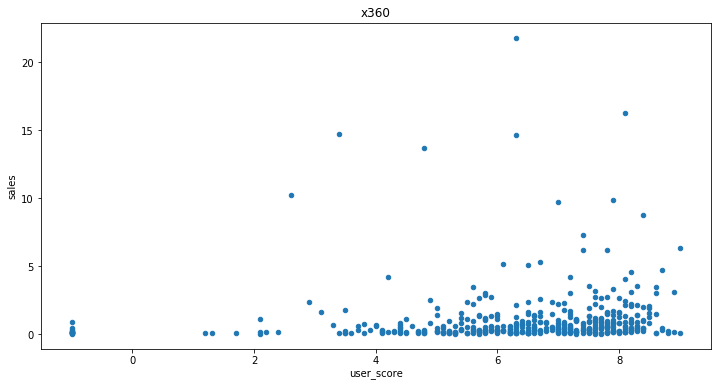

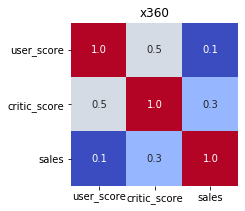

<Figure size 216x216 with 0 Axes>

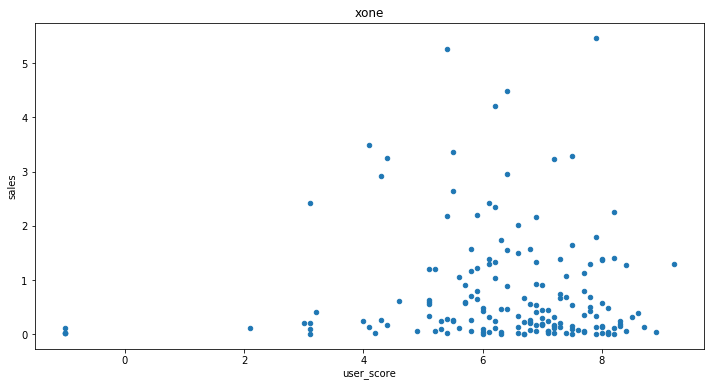

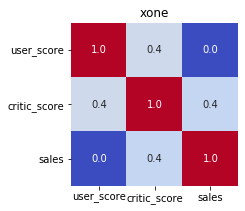

<Figure size 216x216 with 0 Axes>

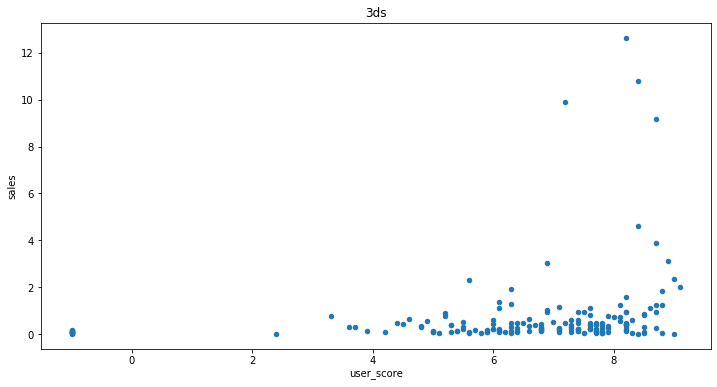

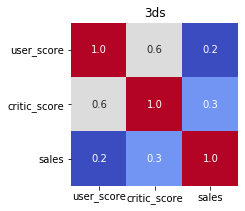

<Figure size 216x216 with 0 Axes>

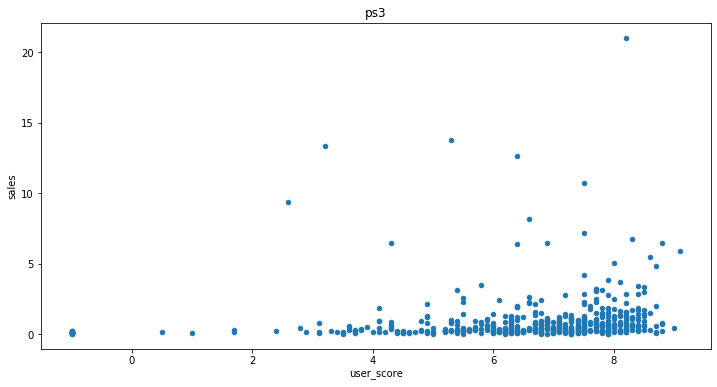

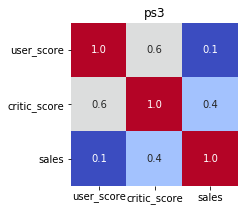

<Figure size 216x216 with 0 Axes>

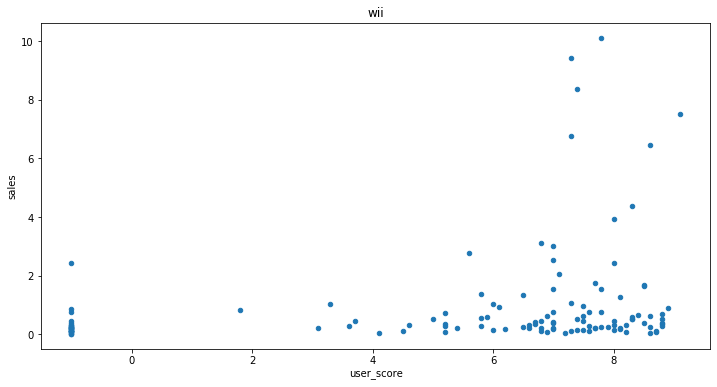

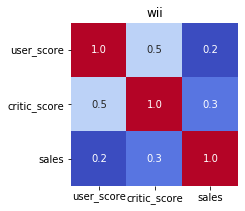

<Figure size 216x216 with 0 Axes>

In [35]:
for i,platform in enumerate(plat):
#     plt.subplot(1, 2,1) 
    g = games_new[(games_new['platform'] == platform) & (games_new['critic_score'] > 0)]
    g.plot(kind='scatter', x='user_score', y='sales', figsize=(12,6))
    plt.title(platform)
    plt.show()
    
#     plt.subplot(1, 2, 2)
    g_ = g[['user_score','critic_score','sales']] 
    plt.figure(figsize = (3,3))
    sns.heatmap(g_.corr(), annot=True, annot_kws={"size": 10},
            cmap= 'coolwarm', cbar=False, fmt=".1f")
    plt.title(platform)
    plt.figure(figsize = (3,3))
    
    plt.show()

Впринципе везде ситуация похожа на изначальную - критики влияют на продажи чуть больше, игроки не влияют.

#### 3.3E Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

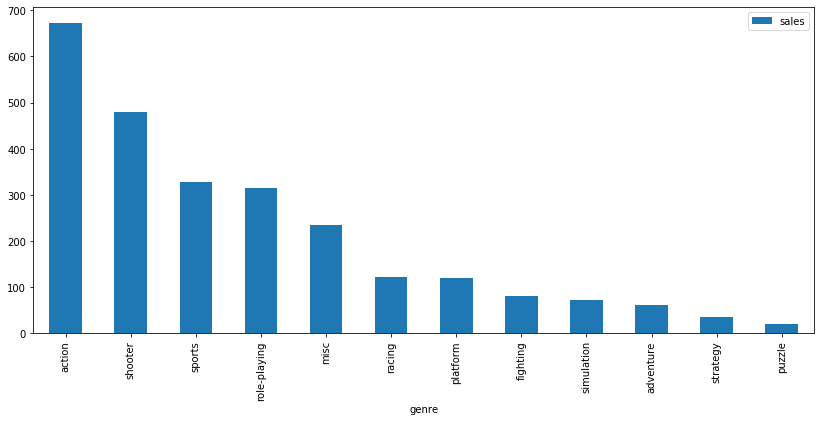

In [36]:
games_new.groupby(by='genre').agg({'sales':'sum'}).sort_values(by='sales', ascending=False).plot(kind='bar',figsize=(14, 6))

Хорошо продаются игры в жанрах action и sports, плохо продаются adventure и strategy.

### <a name="Step4"></a> 4. Портрет пользователя каждого региона

[Наверх](#All)
    

Определите для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [37]:
def graffik(cat):    
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 3, 1)
    a = sns.barplot(data=games_new.groupby(by=cat).agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).reset_index(),
            x=cat, 
            y='na_sales',
            dodge=False,
            color="seagreen"
           )
    a.set_ylim([0, 1400])
    plt.title('na_sales', fontsize=20)
    plt.subplot(1, 3, 2)
    b = sns.barplot(data=games_new.groupby(by=cat).agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).reset_index(),
            x=cat, 
            y='eu_sales',
            dodge=False,
            color="blue"
           )
    b.set_ylim([0, 1400])
    plt.title('eu_sales', fontsize=20)
    plt.subplot(1, 3, 3)
    c = sns.barplot(data=games_new.groupby(by=cat).agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).reset_index(),
            x=cat, 
            y='jp_sales',
            dodge=False,
            color="gray"
           )
    c.set_ylim([0, 1400])
    plt.title('jp_sales', fontsize=20)
#     plt.set_ylim([0, 600])
    plt.show()

#### 4.1

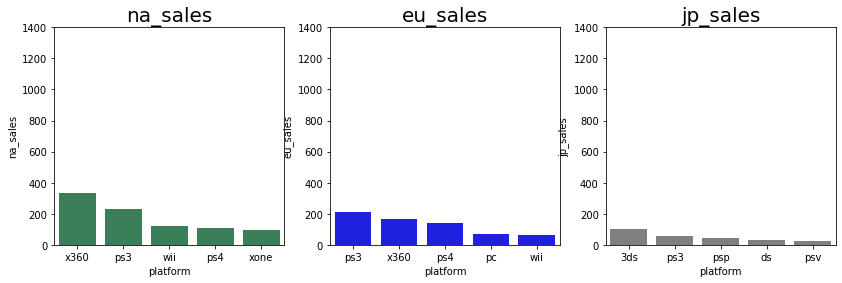

In [38]:
graffik('platform')

Продажи по платформам отличаются, x360 больше любят в северной америке, потому что микрософт, в европе предпочитают японские консоли, но не обходят внимание и x360, в японии, завоевала большую популярность карманная Нинтендо, ну и PS понятное дело.

#### 4.2

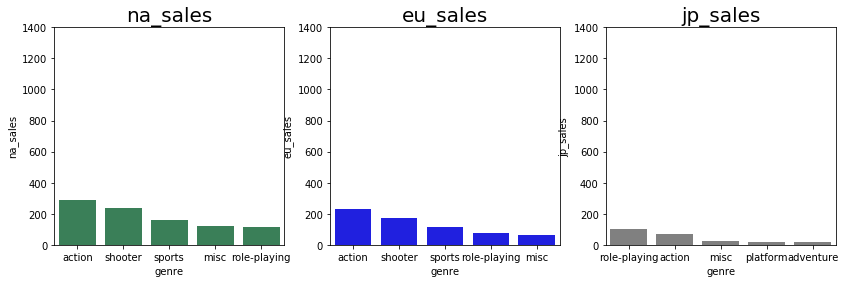

In [39]:
graffik('genre')

По жанрам, Америка и Европа практически одинаковы, разница только в общем объеме продаж, японцы же больше любят ролевые игры.

#### 4.3

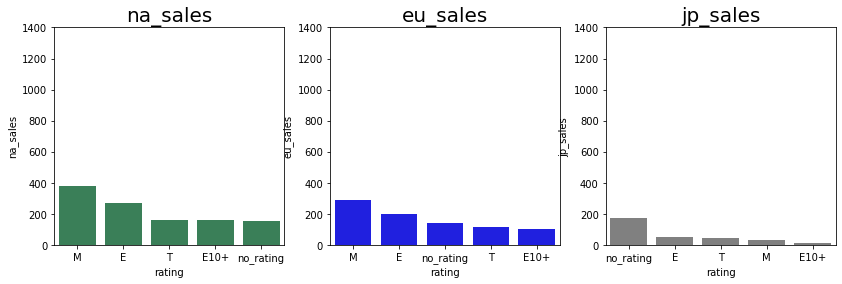

In [40]:
graffik('rating')

По жанрам - Опять же схожие вкусы у Америки и Европы, японцы больше играют в игры по которым нет рейтинга.

### <a name="Step5"></a> 5. Проверка гипотез

[Наверх](#All)

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [41]:
alpha = 0.05

Сформулируем первую гипотезу:

    H0. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    H1. Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [42]:
pc = games_new[(games_new['platform'] == 'pc') & (games_new['user_score'] >= 0 )]['user_score']
xone = games_new[(games_new['platform'] == 'xone') & (games_new['user_score'] >= 0)]['user_score']

In [43]:
xone.var()/pc.var()

0.7782243849390695

Дисперсии не равны больше чем на 5%, используем параметр equal_var = True

In [44]:
results = st.ttest_ind(pc, xone, equal_var=True)

In [45]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.980998110649032
Не получилось отвергнуть нулевую гипотезу


Сформулируем вторую гипотезу:

    H0. Средние пользовательские рейтинги жанров Action и Sports одинаковые
    H1. Средние пользовательские рейтинги жанров Action и Sports разные

In [46]:
action = games_new[(games_new['genre'] == 'action') & (games_new['user_score'] > 0)]['user_score']
sports = games_new[(games_new['genre'] == 'sports') & (games_new['user_score'] > 0)]['user_score']

In [47]:
action.var()/sports.var()

0.6524633545115104

Дисперсии не равны, больше чем на 5%, используем параметр equal_var = True

In [48]:
results = st.ttest_ind(action, sports, equal_var=True)

In [49]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.839124224330309e-19
Отвергаем нулевую гипотезу


* По первой гипотезе - средние пользовательские рейтинги по платформам одинаковые
* По второй гипотезе - средние пользовательские рейтинги по жанрам action и sports разные

### <a name="Step6"></a> 6. Общий вывод

[Наверх](#All)

* В Европе продавать Sony PlayStation, и чуть менее Х-box, следующих поколений, по жанрам - экшены, спортивные с шутерами, делать ставки на ААА - игры.
* В Америке сделать ставку на Х-box, следующего поколения, но не забыть и про Sony PlayStation, игры с жанрами экшен, спорт и шутеры. Опять же не забывать про то что ААА-игры приносят больше всего денег.
* В Японии стоит сделать ставку на карманные консоли и ролевые игры под них. (Не забывать про ААА)
* Не обращать внимание на отзывы игроков, иногда смотреть на отзывы критиков.
* В целом продажи игр падают.